In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time


In [1]:
def compare_edge_detectors(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    results = {}

    # --- Sobel ---
    start = time.time()
    sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    sobel_time = round(time.time() - start, 4)
    results["Sobel"] = (sobel, sobel_time)

    # --- Prewitt ---
    start = time.time()
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewittx = cv2.filter2D(blur, -1, kernelx)
    prewitty = cv2.filter2D(blur, -1, kernely)
    prewitt = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))
    prewitt_time = round(time.time() - start, 4)
    results["Prewitt"] = (prewitt, prewitt_time)

    # --- Laplacian ---
    start = time.time()
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)
    lap_time = round(time.time() - start, 4)
    results["Laplacian"] = (laplacian, lap_time)

    # --- Canny ---
    start = time.time()
    canny = cv2.Canny(blur, 100, 200)
    canny_time = round(time.time() - start, 4)
    results["Canny"] = (canny, canny_time)

    return gray, results


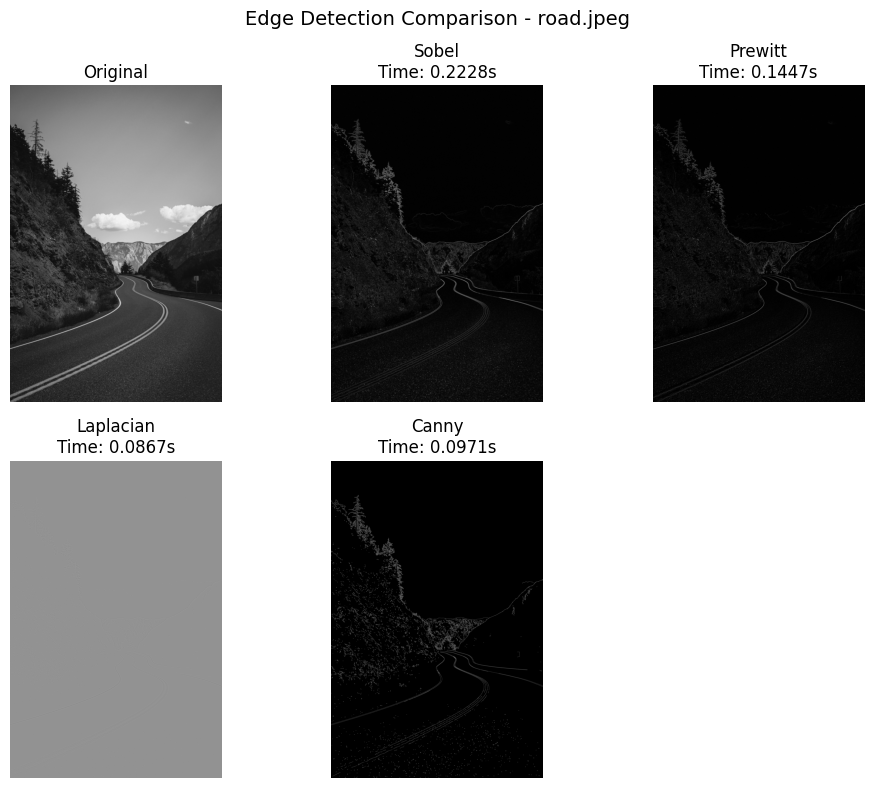

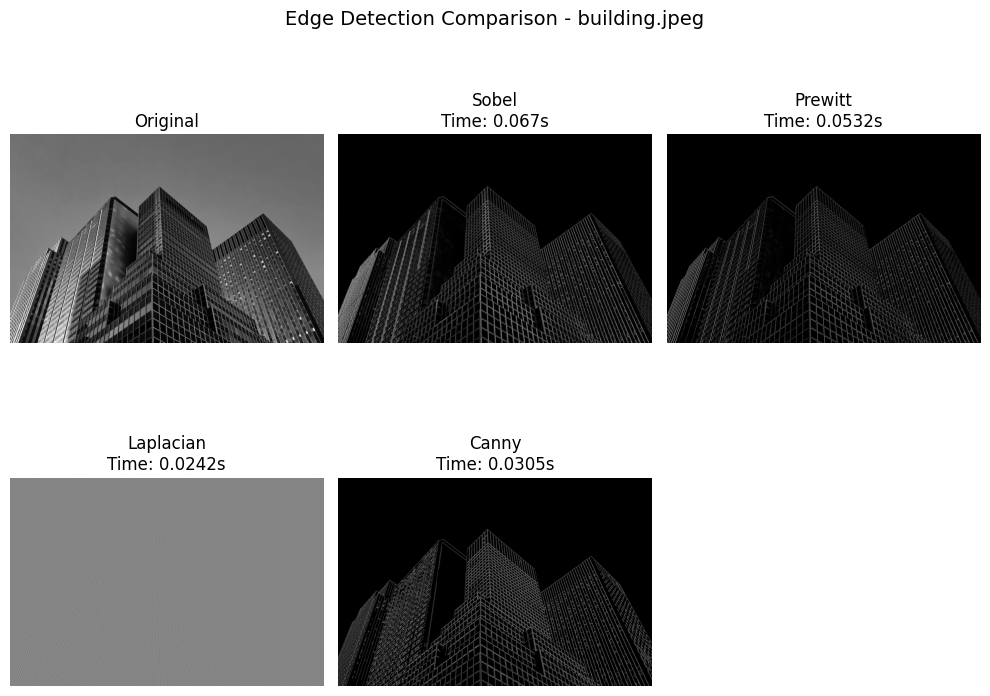

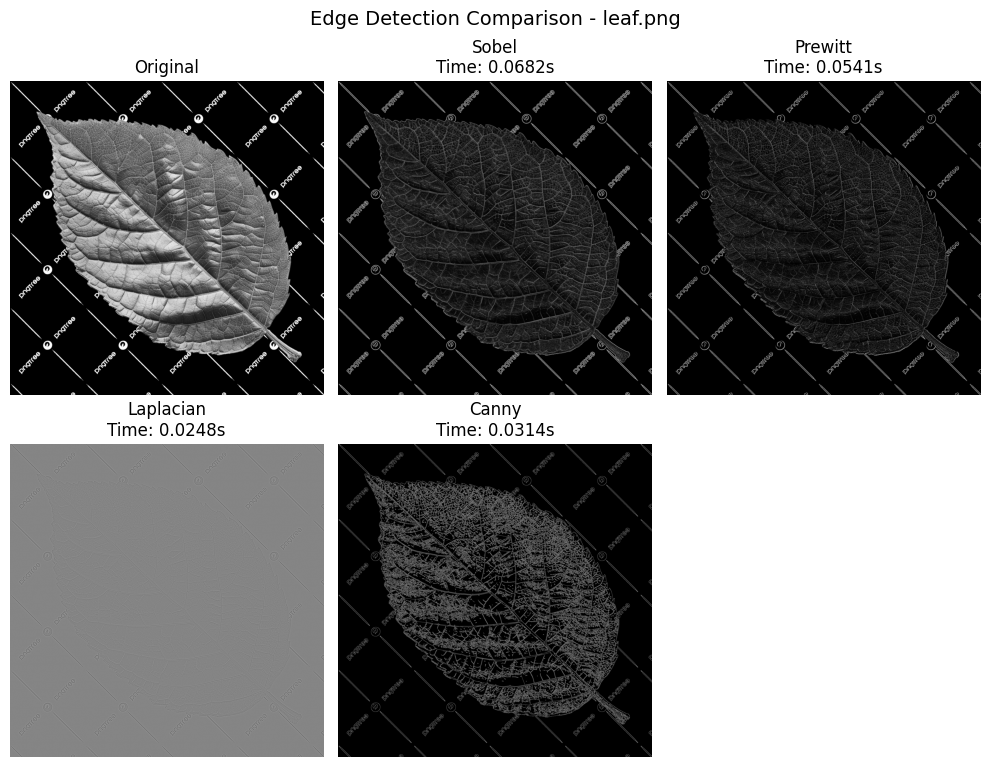

In [5]:
image_list = ['road.jpeg', 'building.jpeg', 'leaf.png']  # Add 3 sample images
for img_path in image_list:
    gray, results = compare_edge_detectors(img_path)

    plt.figure(figsize=(10,8))
    plt.suptitle(f'Edge Detection Comparison - {img_path}', fontsize=14)
    plt.subplot(2,3,1); plt.imshow(gray, cmap='gray'); plt.title('Original'); plt.axis('off')

    for i, (name, (output, t)) in enumerate(results.items()):
        plt.subplot(2,3,i+2)
        plt.imshow(output, cmap='gray')
        plt.title(f'{name}\nTime: {t}s')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [6]:
def edge_density(edge_img):
    edge_pixels = np.count_nonzero(edge_img)
    total_pixels = edge_img.size
    return round((edge_pixels / total_pixels) * 100, 2)


In [7]:
for name, (output, t) in results.items():
    density = edge_density(output)
    print(f"{name} | Time: {t}s | Edge Density: {density}%")


Sobel | Time: 0.0682s | Edge Density: 48.22%
Prewitt | Time: 0.0541s | Edge Density: 37.91%
Laplacian | Time: 0.0248s | Edge Density: 46.36%
Canny | Time: 0.0314s | Edge Density: 8.68%
